# Decomposição (Aula 1)

In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
url =  'https://raw.githubusercontent.com/alura-cursos/COVID-Alura/main/cases-brazil-states.csv'
df = pd.read_csv(url)
df['data'] = pd.to_datetime(df.data).dt.date
df.tail()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
3957,31,2020-07-31,Brazil,SC,TOTAL,59,1102,3169,84073,1102,84073,15.38078,1173.41923,0.01311,70601.0,9573.0,282607.0,3944.38747
3958,31,2020-07-31,Brazil,SE,TOTAL,26,1434,1029,58713,1434,58713,62.38319,2554.18724,0.02442,30937.0,6466.0,93587.0,4071.30825
3959,31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886
3960,31,2020-07-31,Brazil,TO,TOTAL,9,390,522,25346,381,24824,24.79550,1611.45323,0.01539,15035.0,8367.0,33685.0,2141.63190
3961,31,2020-07-31,Brazil,TOTAL,TOTAL,1267,92728,53264,2670451,92475,2662485,44.12528,1270.75305,0.03472,2008854.0,1079525.0,6988772.0,3325.65673


In [3]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#tá dando errado pra instalar esse STL !pip install git+https://github.com/statsmodels/statsmodels.git
!pip install git+https://github.com/statsmodels/statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-d2m72vki
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-d2m72vki


In [6]:
resultados = seasonal_decompose(df_sp.novosObitos, freq = 7)
resultados

In [7]:
df_sp.index = pd.to_datetime(df_sp.data)

In [8]:
def plotar(y1,y2,y3,cor1,cor2,cor3,label1,label2,label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1,color=cor1,label=label1)
    plt.plot(y2,color=cor2,label=label2)
    plt.plot(y3,color=cor3,label=label3)
    plt.legend(fontsize=18)

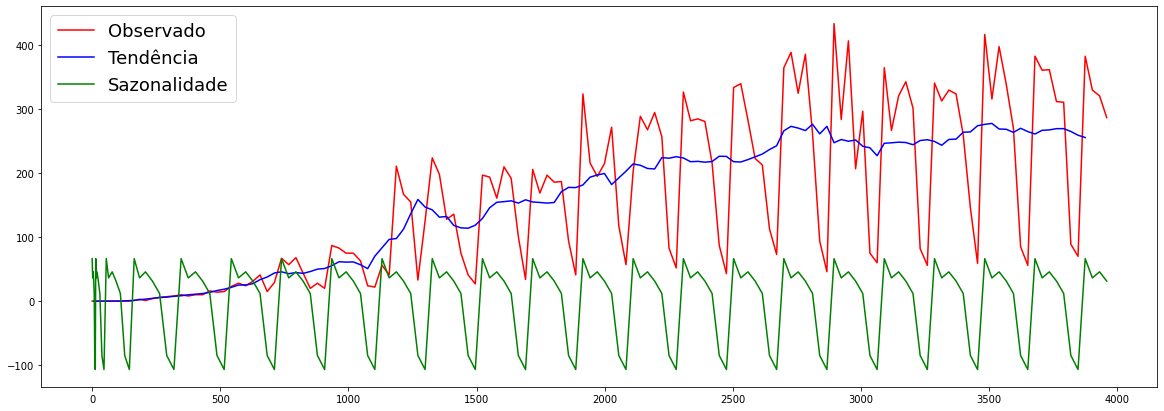

In [9]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red','blue','green',
      'Observado','Tendência','Sazonalidade')

In [10]:
df_mg = df[df['estado'] == 'MG']
df_rj = df[df['estado'] == 'RJ']
df_mg.index = pd.to_datetime(df_mg.data)
df_rj.index = pd.to_datetime(df_rj.data)

In [11]:
resultados_rj = seasonal_decompose(df_rj.novosObitos, freq = 7)
resultados_mg = seasonal_decompose(df_mg.novosObitos, freq = 7)

In [12]:
plotar(resultados.trend, resultados_rj.trend,resultados_mg.trend, 'red','blue','green',
      'SP','RJ','MG') #tendencia de sp, rj e mg.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb7da3978c0> (for post_execute):


ValueError: ignored

ValueError: ignored

In [13]:
plotar(resultados.seasonal, resultados_rj.seasonal,resultados_mg.seasonal, 'red','blue','green',
      'SP','RJ','MG') #sazonalidade de sp, rj e mg.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb7da3978c0> (for post_execute):


ValueError: ignored

ValueError: ignored

# Diferenciação, estacionaridade e autocorrelação (Aula 2)

## Estacionariedade e autocorrelação

Verificar se a série temporal é ESTACIONÁRIA:

1) verificar a TENDENCIA (crescimento/decrescimento ao longo do tempo). Deve estar presente por TODA a série temporal, e não só por um espaço de tempo.

2) verificar a SAZONALIDADE (Variação em uma frequência física ).

Série Estacionária: Quando a média e a variância são constantes ao longo do tempo (quando não há tendencia e sazonalidade). Geralmente, transformamos uma série não estacionária em uma estacionaria diferenciando.

Como saber se é estacionaria? Teste ADF ( é um teste de hipotese )


Autocorrelação(ACF):

É a medida de quanto duas variáveis estão linearmente relacionadas. É a medida de quanto duas observações da mesma série temporal estão linearmente relacionadas.
"É de característica de uma série temporal que haja uma autocorrelação forte"

Autocorrelação Parcial(PACF): 

Correlação parcial entre duas variáveis é a quantidade de correlação entre elas que não é explicada por suas correlações mútuas com um conjunto especificado de outras variáveis. Ela determina a correlação entre o dado observado e o resíduo. Ou seja, os valores que ficam (apóis removermos os efeitos já explicados pelos lags anteriores-calculados na autocorrelação completa)
"Se existir informação residual importante, vamos descobrir na correlação parcial"


## Diferenciação e ACF

In [ ]:
y = df_sp['Casos']
y.head()

data
2020-02-25    1
2020-02-26    1
2020-02-27    1
2020-02-28    2
2020-02-29    2
Name: Casos, dtype: int64

In [ ]:
from statsmodels.tsa.stattools import adfuller#funcão pra fazer o teste adf e ver se nossa série temporal é estacionária
adfuller(y.dropna())

(1.3664743612803403,
 0.9969563888815705,
 14,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 2627.7242380318335)

In [ ]:
print('p-valor:',adfuller(y.dropna())[1])#verificando o pvalor. F, logo não é Estacionária

p-valor: 0.9969563888815705


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #vamos tentar plotar a acf e pacf pra vermos como elas ficam antes da diferenciação

In [ ]:
def plotarACF(y1,y2,y3): #criando a função pra gerar os gráficos
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1,ax=ax1,title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2,ax=ax2,title='1ª Diferenciação')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3,ax=ax3,title='2ª Diferenciação')

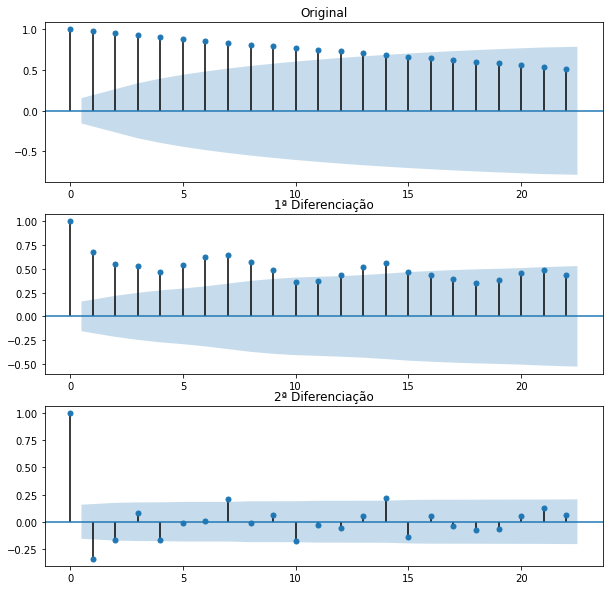

In [ ]:
plotarACF(y,y.diff().dropna(),y.diff().diff().dropna())
#o g1 é autocorrelação,g2 1 diferenciação (a sazonalidade começa a importar um pouco mais) 
#e o g3 é a 2 diferenciação (já não tem mais esse comportamento repetitivo (talvez derivamos demais ('sobrediferenciação')))é isso que vamos ver a seguir

## Checando a estacionaridade

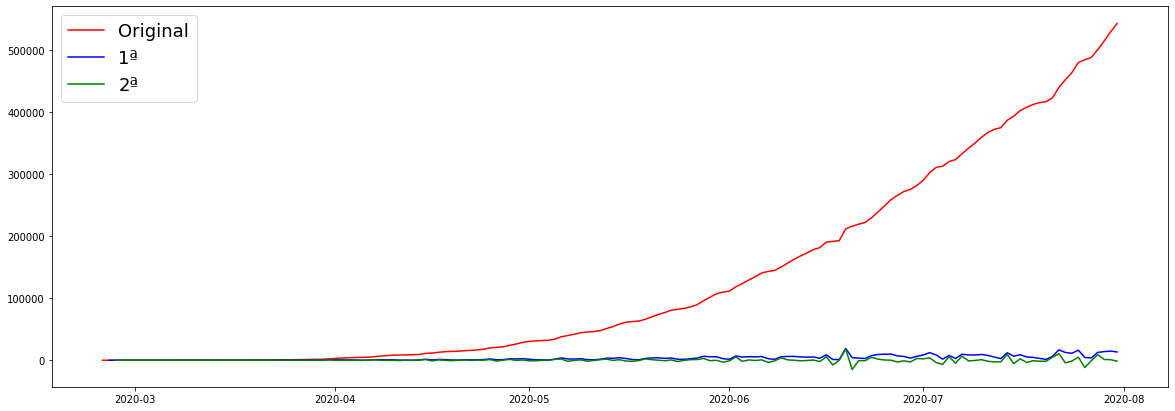

In [ ]:
plotar(y,y.diff(),y.diff().diff(),'red','blue','green','Original','1ª','2ª') #plotando y,y' e y'' (y=df_sp)
# oq ue nota-se é que não há muita diferença da 1 pra 2 diferenciação

Modelos para prever uma série temporal: o autorregressivo, tem a média móvel, MA, o AR e tal

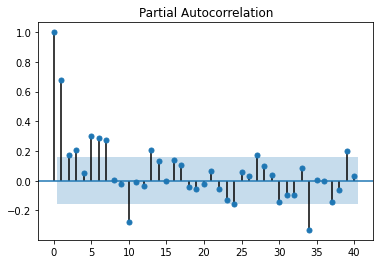

In [ ]:
plot_pacf(y.diff().dropna(),lags=40); #y'

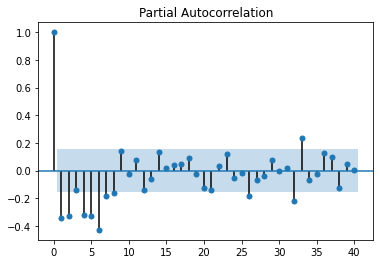

In [ ]:
plot_pacf(y.diff().diff().dropna(),lags=40);#y''. Gerou uma correlação negativa "supergrande". Concluimos que estamos manipulando demais os nossos dados. É melhor que você diferencie menos e sobre assim algumas informações.
# Por isso vamos continuar somente com 1 diferenciação apenas.

## Metricas do ARIMA

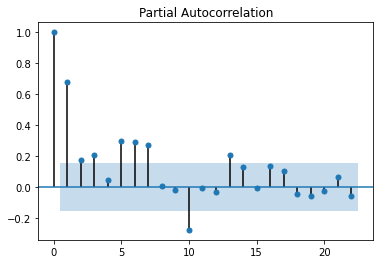

In [ ]:
plot_pacf(y.diff().dropna());
# Vamos contar quantos lags estão acima da parte azul (significancia aceitável). 
# O primeiro dia está muito acima da significancia, isso vai determinar o nosso q = lag 1
# o d é o nosso 1 (Vimos lá em cima)

ARIMA(p=1,d=1,1=1)

o p está relacionado à parte do modelo autoregressivo AR

o q com moving average MA

o d que é a parte da diferenciação


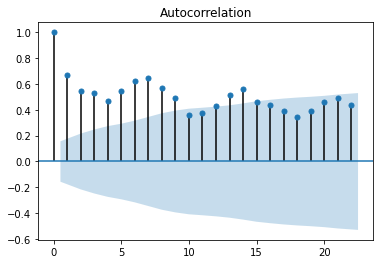

In [ ]:
plot_acf(y.diff().dropna()); 
#mesmo com diferenciação, ainda possui um comportamento de sazonalidade(arima não é tão bom nessas situações). Precisamos usar o arimasazonal.

#temos duas opções: 
 #1) considerar p=1 (para ficar o mais simples possível(já que adicionar mais complexidade não vai melhorar o modelo pelo problema da sazonalidade))
 #2) considerar a segunda diferenciação e teríamos que lidar com o problema de sobrediferenciação (d=2)

 #vamos seguir a 1 opção

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
modelo = ARIMA(y,order=(1,1,1))
modelo_fit = modelo.fit(disp=0)
print(modelo_fit.summary())
# as duas métricas mais importantes é AIC e BIC.
#(critério de informação arcaic, basicamente vai comparar o resultado que você obteve e uma métrica de distância entre o resultado que você obteve e o modelo estatístico real)
#quanto menor aic melhor.
# critério de informação baseano,  uma estimativa da função de probabilidade do seu modelo. Quanto menor melhor também
# Vamos entender a parte teórica nas próximas aulas.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Casos   No. Observations:                  157
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1457.924
Method:                       css-mle   S.D. of innovations           2589.078
Date:                Wed, 01 Jun 2022   AIC                           2923.848
Time:                        20:27:07   BIC                           2936.073
Sample:                    02-26-2020   HQIC                          2928.813
                         - 07-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4551.0126   4373.480      1.041      0.300   -4020.850    1.31e+04
ar.L1.D.Casos     0.9966      0.005    213.933      0.000       0.988       1.006
ma.L1.D.Casos    -0.8463      0.040    -

# Modelo ARIMA (Aula 3)

## ARIMA automático

In [ ]:
import itertools 
p = d= q = range(0,2)
pdq = list(itertools.product(p, d, q))# faz todas as combinações possíveis para os valores de pdq entre 0 e 2
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]# esse 7 é o período da sazonalidade(semanal)

In [ ]:
print('Exemplo de combinação de parâmetros para o ARIMA Sazonal')
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[2]))
#É dessa forma que vamos variar nossos parametros, para que consigamos uma combinação de parametros tanto da parte não sazonal quanto da sazonal
#Vamos rodar cada uma dessas opções e pegar a que tiver a menor métrica

Exemplo de combinação de parâmetros para o ARIMA Sazonal
SARIMAX: (0, 0, 0) x (0, 0, 0, 7)
SARIMAX: (0, 0, 0) x (0, 0, 1, 7)
SARIMAX: (0, 0, 0) x (0, 1, 0, 7)


In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


## AIC e diagnóstico

In [ ]:
y = df_sp['Casos']
y

data
2020-02-25         1
2020-02-26         1
2020-02-27         1
2020-02-28         2
2020-02-29         2
               ...  
2020-07-27    487654
2020-07-28    500301
2020-07-29    514197
2020-07-30    529006
2020-07-31    542304
Name: Casos, Length: 158, dtype: int64

In [ ]:
import statsmodels.api as sm #vamos calcular o arima para todos os casos
aic_lista = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

## Métricas

In [ ]:
aic_lista #pegar o ultimo (tá ordenado)

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC4312.204463385908',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC4234.919433193507',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3562.871711196248',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC3494.158268075518',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC3852.0136730324284',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3640.408777837486',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC3149.4477404373224',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC3148.656019769276',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC4203.637153156367',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC4186.578948235594',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC3367.0927240192477',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC3273.05193837983',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC4175.643287398025',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC4177.533546287326',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC3346.330501644811',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC3419.811044854108',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC3140.724225355021',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC3055.2982248350454',
 'ARIMA

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y, 
                               order = (1,1,1),#o melhor resultado
                               seasonal_order=(1,1,1,7))
results = mod.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


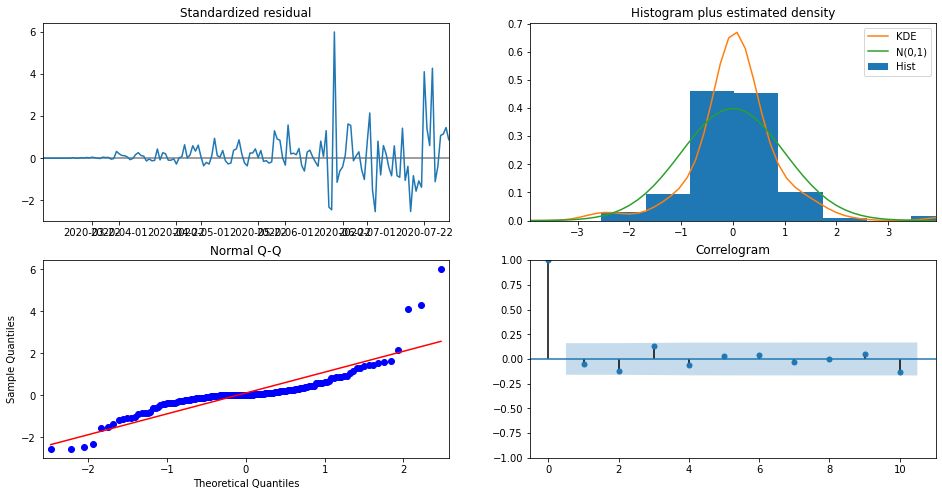

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()
#1) quantidade de residuos em função da série temporal. Vemos que algumas datas específicas possuem pouco ou muito resíduo
#2) histograma, observamos uma dist normal, e a dist kde (distribuição dos resíduos (queremos que ele se aproxime da normal-
  #mas não é o caso dessa série temporal))
#3)Correlograma, onde vemos as autocorrelações residuais, que são extremamente baixas(<0.25).
  # Isso significa que de fato o modelo conseguiu transformar a série em algo estacionário antes de fazer as previsões.
#4)QQ, "Q de quantil", É uma comparação entre quantis. 
  #Quanto mais próximo os pontos azuis da linha vermelha mais próximo dos nossos dados esse modelo está 


# Decomposição (Aula 4)

Intervalo da confiança

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False) #vamos criar a variavel "predição"
pred_ic = pred.conf_int() # vamos pegar um intervalo para 
pred_ic

In [ ]:
ax = y['2020':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k',alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.legend()
plt.show()

Prevendo e comparando

In [ ]:
pred_uc = results.get_forecast(steps=150) #steps "quantos dias queremos prever"
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0],pred_ic.iloc[:,1],color='k',alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.show()
#observamos que o intervalo de confiança fica maior. 

In [ ]:
df_att = pd.read_csv('cases-brazil-states-att.csv') #vamos importar os dados até 2021
df_att = df_att[df_att['state'] == 'SP']
df_att = df_att.rename(columns = {'date':'data'})
df_att.head() #vemos que esse dado está mais atualizado (possui datas mais recentes)

In [ ]:
df_att['data'] = pd.to_datetime(df_att['data']).dt.date
df_att.index = df_att['data']
df_att.head()

In [ ]:
x = df_att['totalCases']
plt.figure(figsize=(20,7))
fig = plt.plot(x,label='Correto') # nossos dados novos (o que de fato aconteceu)
ax = y.plot(label='Observado') #plotar os dados até julho
pred_uc.predicted_mean.plot(ax=ax, label='Previsto') # acrescentando a previsão
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0],pred_ic.iloc[:,1], color='k',alpha=0.25)#adicionando o IC
ax.set_xlabel('Data',fontsize=18)
ax.set_ylabel('Casos de COVID-19',fontsize=18)
plt.legend(fontsize=16) 
#observamos que nossa previsão seguiu o que tinhamos antes. 
  #Isso significa que talvez as ações tomadas para diminuir os contamidados pode ter tido resultados.


# Desafio (Aula 5)